In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

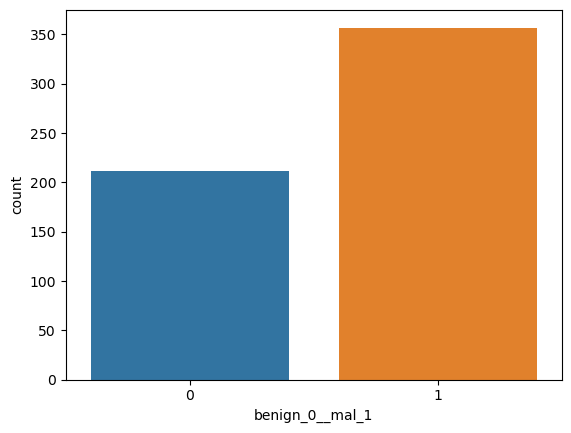

In [9]:
sns.countplot(x=df['benign_0__mal_1'], data=df)

<AxesSubplot:>

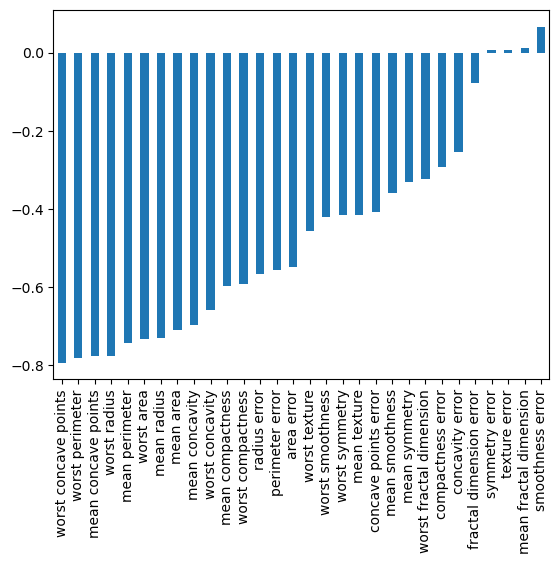

In [14]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

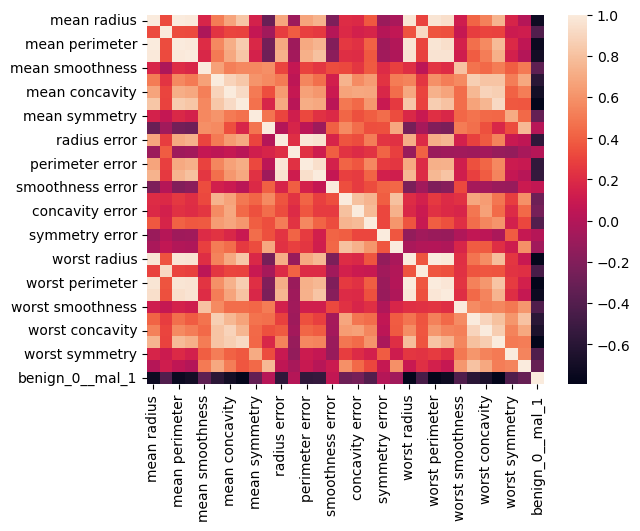

In [15]:
sns.heatmap(df.corr())

In [16]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [18]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [32]:
X_train = scaler.fit_transform(X_train)

In [33]:
X_test = scaler.transform(X_test)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [35]:
model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(15, activation='relu'))

# Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [36]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6946 - val_loss: 0.6834
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6797 - val_loss: 0.6695
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6641 - val_loss: 0.6539
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6468 - val_loss: 0.6353
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6257 - val_loss: 0.6098
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5967 - val_loss: 0.5778
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5636 - val_loss: 0.5400
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5238 - val_loss: 0.4976
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4827 - val_loss: 0.4569
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4401 - val_loss: 0.4114
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0536 - val_loss: 0.1091
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0527 - val_loss: 0.1142
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0548 - val_loss: 0.1135
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0540 - val_loss: 0.1146
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0523 - val_loss: 0.1112
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0509 - val_loss: 0.1129
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0507 - val_loss: 0.1166
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0505 - val_loss: 0.1161
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0506 - val_loss: 0.1122
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0507 - val_loss: 0.1187
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0403 - val_loss: 0.1461
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0413 - val_loss: 0.1389
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0411 - val_loss: 0.1394
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0428 - val_loss: 0.1519
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.1509
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0457 - val_loss: 0.1501
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0458 - val_loss: 0.1379
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0373 - val_loss: 0.1546
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0381 - val_loss: 0.1417
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0400 - val_loss: 0.1434
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0298 - val_loss: 0.1798
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0296 - val_loss: 0.1716
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0293 - val_loss: 0.1798
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0306 - val_loss: 0.1861
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0303 - val_loss: 0.1758
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0277 - val_loss: 0.1988
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0280 - val_loss: 0.1739
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0277 - val_loss: 0.1933
Epoch 253/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0270 - val_loss: 0.1813
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0283 - val_loss: 0.1840
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0266 - val_loss: 0.2728
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0221 - val_loss: 0.2168
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0217 - val_loss: 0.2398
Epoch 329/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0215 - val_loss: 0.2330
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0235 - val_loss: 0.2413
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0210 - val_loss: 0.2242
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0199 - val_loss: 0.2388
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0226 - val_loss: 0.2431
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0200 - val_loss: 0.2297
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0218 - val_loss: 0.2576
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0152 - val_loss: 0.2931
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0178 - val_loss: 0.2970
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0145 - val_loss: 0.2917
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0141 - val_loss: 0.2873
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0148 - val_loss: 0.2778
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0137 - val_loss: 0.2966
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0140 - val_loss: 0.2877
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0140 - val_loss: 0.2754
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0146 - val_loss: 0.3129
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0144 - val_loss: 0.2875
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0126 - val_loss: 0.3720
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0104 - val_loss: 0.3452
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.3565
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0092 - val_loss: 0.3352
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0095 - val_loss: 0.3582
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0099 - val_loss: 0.3431
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.3691
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0108 - val_loss: 0.3632
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0094 - val_loss: 0.3396
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.3481
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.4142
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.4641
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.4260
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.4237
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.4253
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.4342
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0064 - val_loss: 0.4001
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0076 - val_loss: 0.4495
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.4211
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 0.4308
Epoc

<AxesSubplot:>

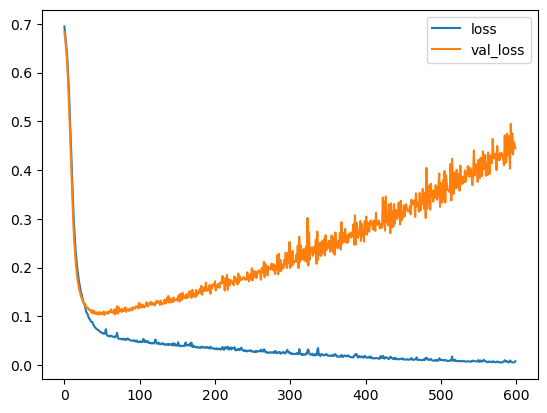

In [38]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

Because the validation loss deviates from the training loss, we know we are overfitting

In [39]:
model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(15, activation='relu'))

# Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 

In [43]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [44]:
model.fit(x=X_train, y=y_train, 
          epochs=600, 
          validation_data=(X_test, y_test), 
          metrics=['accuracy'], 
          callbacks=early_stop)

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6580 - val_loss: 0.6398
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6179 - val_loss: 0.6061
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5825 - val_loss: 0.5682
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5403 - val_loss: 0.5245
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4954 - val_loss: 0.4794
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4522 - val_loss: 0.4320
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4086 - val_loss: 0.3885
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3747 - val_loss: 0.3511
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3293 - val_loss: 0.3116
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2994 - val_loss: 0.2836
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0542 - val_loss: 0.1125
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0523 - val_loss: 0.1072
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0512 - val_loss: 0.1048
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0529 - val_loss: 0.1116
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0503 - val_loss: 0.1037
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0520 - val_loss: 0.1025
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0541 - val_loss: 0.1090
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0516 - val_loss: 0.1074
Epoch 90: early stopping


<AxesSubplot:>

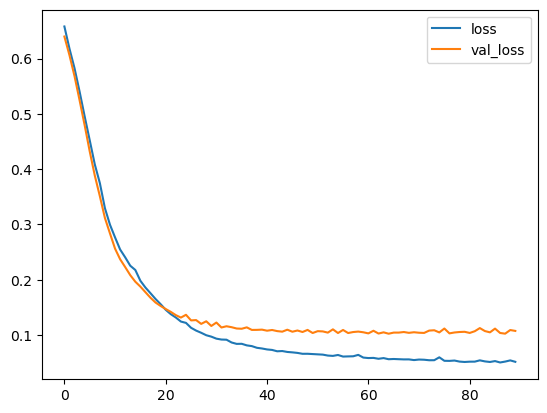

In [45]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [48]:
dropout_model = Sequential()

dropout_model.add(Dense(X_train.shape[1], activation='relu'))
dropout_model.add(Dropout(0.5))

dropout_model.add(Dense(15, activation='relu'))
dropout_model.add(Dropout(0.5))

# Binary classification
dropout_model.add(Dense(1, activation='sigmoid'))

dropout_model.compile(optimizer='adam', loss='binary_crossentropy')

In [49]:
dropout_model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=early_stop)

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.7157 - val_loss: 0.6698
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6804 - val_loss: 0.6521
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6635 - val_loss: 0.6285
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6365 - val_loss: 0.5981
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6221 - val_loss: 0.5703
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5973 - val_loss: 0.5447
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5851 - val_loss: 0.5167
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5361 - val_loss: 0.4858
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5357 - val_loss: 0.4589
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5151 - val_loss: 0.4292
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.1199 - val_loss: 0.1010
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1124 - val_loss: 0.0979
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1317 - val_loss: 0.0986
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1211 - val_loss: 0.0927
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1242 - val_loss: 0.1102
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1303 - val_loss: 0.0932
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1310 - val_loss: 0.1017
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1072 - val_loss: 0.1063
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1070 - val_loss: 0.1011
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1047 - val_loss: 0.0911
Epoch 93/600


<AxesSubplot:>

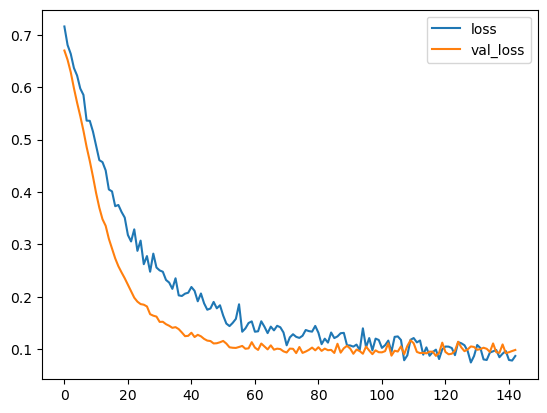

In [50]:
dropout_model_loss = pd.DataFrame(dropout_model.history.history)
dropout_model_loss.plot()

In [59]:
y_pred = dropout_model.predict(X_test) > 0.5
y_pred

5/5 [==============================] - 0s 1ms/step


array([[ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [62]:
print(confusion_matrix(y_test, y_pred))

[[54  1]
 [ 2 86]]
